In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, GlobalAveragePooling2D, Conv2D, MaxPool2D
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
train = pd.read_csv('resources/mnist_train.csv')

In [3]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [5]:
np.random.seed(10)

remove_n = 45000
drop_indices = np.random.choice(train.index, remove_n, replace=False)
train_subset = train.drop(drop_indices)

In [6]:
train_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 2 to 59995
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 90.0 MB


In [7]:
train_subset.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
Y_train = train_subset["label"]
X_train = train_subset.drop(labels = ["label"],axis = 1) 

In [9]:
Y_train.value_counts()

1    1713
7    1550
8    1518
9    1515
3    1511
0    1504
4    1487
6    1472
2    1429
5    1301
Name: label, dtype: int64

In [10]:
X_train = X_train / 255.0

In [11]:
X_train = X_train.values.reshape(-1,28,28,1)

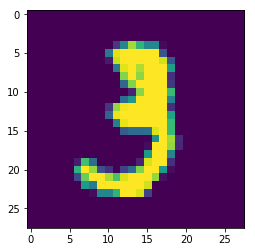

In [14]:
g = plt.imshow(X_train[3][:,:,0])

In [15]:
Y_train = to_categorical(Y_train, num_classes = 10)

In [16]:
images_train, images_val, labels_train, labels_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state=42)

In [17]:
images_train.shape

(12000, 28, 28, 1)

In [18]:
datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=False,
        fill_mode='nearest')

datagen.fit(images_train)

In [19]:
neural_network = Sequential()
neural_network.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same',
                  activation='relu', input_shape = (28,28,1)))
neural_network.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same',
                  activation='relu'))
neural_network.add(MaxPool2D(pool_size=(2, 2)))
neural_network.add(Dropout(0.25))

neural_network.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same',
                          activation='relu'))
neural_network.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same',
                          activation='relu'))
neural_network.add(MaxPool2D(pool_size=(2, 2)))
neural_network.add(Dropout(0.25))

neural_network.add(GlobalAveragePooling2D())
neural_network.add(Dense(10, activation="softmax"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [20]:
neural_network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [21]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
neural_network.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [22]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.000001)
epochs = 9
batch_size = 30
neural_network.fit(np.array(images_train), np.array(labels_train), batch_size=batch_size,
                             epochs=epochs, validation_data=(np.array(images_val), np.array(labels_val)), verbose=2,
                             callbacks=[learning_rate_reduction])

Instructions for updating:
Use tf.cast instead.
Train on 12000 samples, validate on 3000 samples
Epoch 1/9
 - 68s - loss: 1.3159 - acc: 0.5445 - val_loss: 0.5047 - val_acc: 0.8650
Epoch 2/9
 - 67s - loss: 0.5188 - acc: 0.8445 - val_loss: 0.2803 - val_acc: 0.9223
Epoch 3/9
 - 65s - loss: 0.3192 - acc: 0.9042 - val_loss: 0.1940 - val_acc: 0.9473
Epoch 4/9
 - 67s - loss: 0.2296 - acc: 0.9315 - val_loss: 0.1411 - val_acc: 0.9557
Epoch 5/9
 - 67s - loss: 0.1723 - acc: 0.9475 - val_loss: 0.1230 - val_acc: 0.9637
Epoch 6/9
 - 67s - loss: 0.1432 - acc: 0.9577 - val_loss: 0.0847 - val_acc: 0.9740
Epoch 7/9
 - 67s - loss: 0.1200 - acc: 0.9645 - val_loss: 0.0999 - val_acc: 0.9707
Epoch 8/9
 - 67s - loss: 0.1033 - acc: 0.9678 - val_loss: 0.1075 - val_acc: 0.9660
Epoch 9/9
 - 67s - loss: 0.0902 - acc: 0.9740 - val_loss: 0.1194 - val_acc: 0.9650

Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


In [21]:
neural_network_augm = Sequential()
neural_network_augm.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same',
                  activation='relu', input_shape = (28,28,1)))
neural_network_augm.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same',
                  activation='relu'))
neural_network_augm.add(MaxPool2D(pool_size=(2, 2)))
neural_network_augm.add(Dropout(0.25))

neural_network_augm.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same',
                          activation='relu'))
neural_network_augm.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same',
                          activation='relu'))
neural_network_augm.add(MaxPool2D(pool_size=(2, 2)))
neural_network_augm.add(Dropout(0.25))

neural_network_augm.add(GlobalAveragePooling2D())
neural_network_augm.add(Dense(10, activation="softmax"))

In [22]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
neural_network_augm.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [23]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.000001)
epochs = 7
batch_size = 9
neural_network_augm.fit_generator(datagen.flow(images_train, labels_train, batch_size=batch_size),
                             epochs=epochs, validation_data=(np.array(images_val), np.array(labels_val)), verbose=2,
                             steps_per_epoch=images_train.shape[0] // batch_size,
                             callbacks=[learning_rate_reduction])

Epoch 1/7
 - 29s - loss: 1.2297 - acc: 0.5781 - val_loss: 0.3127 - val_acc: 0.9043
Epoch 2/7
 - 28s - loss: 0.4250 - acc: 0.8719 - val_loss: 0.1679 - val_acc: 0.9530
Epoch 3/7
 - 28s - loss: 0.2661 - acc: 0.9209 - val_loss: 0.1574 - val_acc: 0.9583
Epoch 4/7
 - 28s - loss: 0.2059 - acc: 0.9387 - val_loss: 0.0932 - val_acc: 0.9720
Epoch 5/7
 - 28s - loss: 0.1723 - acc: 0.9516 - val_loss: 0.0820 - val_acc: 0.9733
Epoch 6/7
 - 28s - loss: 0.1519 - acc: 0.9561 - val_loss: 0.0842 - val_acc: 0.9740
Epoch 7/7
 - 28s - loss: 0.1343 - acc: 0.9592 - val_loss: 0.0684 - val_acc: 0.9777


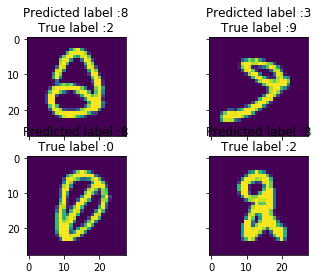

In [24]:
predictions = neural_network.predict(images_val)
# Convert to one hot vectors
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels_val, axis=1)

# extract method and move to error_analyser
errors = predicted_labels - true_labels != 0

numerical_values_of_predicted_errors = predictions[errors]
predicted_probabilities_of_errors = np.max(numerical_values_of_predicted_errors, axis=1)

labels_of_incorrectly_classified_images = true_labels[errors]
predicted_probabilities_of_correct_images \
    = np.diagonal(np.take(numerical_values_of_predicted_errors, labels_of_incorrectly_classified_images, axis=1))

differences_of_probabilities = predicted_probabilities_of_errors - predicted_probabilities_of_correct_images
sorted_differences = np.argsort(differences_of_probabilities)

def display_errors(errors_index, img_errors, pred_errors, obs_errors):
        n = 0
        nrows = 2
        ncols = 2
        fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True)
        for row in range(nrows):
            for col in range(ncols):
                error = errors_index[n]
                ax[row, col].imshow((img_errors[error]).reshape((28, 28)))
                ax[row, col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error], obs_errors[error]))
                n += 1

# Top 4 errors
if len(sorted_differences) >= 4:
    most_important_errors = sorted_differences[-4:]
    display_errors(most_important_errors, images_val[errors],
                                  predicted_labels[errors], labels_of_incorrectly_classified_images)
    plt.show()


In [25]:
images_train = images_train.reshape(-1,784,1)
images_val = images_val.reshape(-1,784,1)
labels_train = labels_train
labels_val = labels_val

In [26]:
images_train.shape

(12000, 784, 1)

In [27]:
images_val.shape

(3000, 784, 1)

In [28]:
labels_train.shape

(12000, 10)

In [29]:
images_train = images_train[:,:,0]
images_val = images_val[:,:,0]

In [30]:
images_train.shape

(12000, 784)

In [31]:
neural_network_dense = Sequential()
neural_network_dense.add(Dense(256, input_shape=(784,), activation='relu'))

neural_network_dense.add(Dense(128, activation='relu'))
neural_network_dense.add(Dense(64, activation='relu'))
neural_network_dense.add(Dropout(0.5))

neural_network_dense.add(Dense(128, activation='relu'))
neural_network_dense.add(Dense(64, activation='relu'))
neural_network_dense.add(Dropout(0.5))

neural_network_dense.add(Dense(128, activation='relu'))
neural_network_dense.add(Dense(64, activation='relu'))
neural_network_dense.add(Dropout(0.5))

neural_network_dense.add(Dense(64, activation='relu'))
neural_network_dense.add(Dense(32, activation='relu'))
neural_network_dense.add(Dense(10, activation="softmax"))

In [32]:
neural_network_dense.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
__________

In [33]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
neural_network_dense.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [34]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.000001)
epochs = 9
batch_size = 30
neural_network_dense.fit(np.array(images_train), np.array(labels_train), batch_size=batch_size,
                             epochs=epochs, validation_data=(np.array(images_val), np.array(labels_val)), verbose=2,
                             callbacks=[learning_rate_reduction])

Train on 12000 samples, validate on 3000 samples
Epoch 1/9
 - 2s - loss: 1.6514 - acc: 0.3740 - val_loss: 0.9550 - val_acc: 0.5990
Epoch 2/9
 - 1s - loss: 0.9063 - acc: 0.6603 - val_loss: 0.6962 - val_acc: 0.7330
Epoch 3/9
 - 1s - loss: 0.6422 - acc: 0.7860 - val_loss: 0.4653 - val_acc: 0.8567
Epoch 4/9
 - 1s - loss: 0.5052 - acc: 0.8469 - val_loss: 0.4552 - val_acc: 0.8370
Epoch 5/9
 - 2s - loss: 0.4226 - acc: 0.8912 - val_loss: 0.4525 - val_acc: 0.8850
Epoch 6/9
 - 2s - loss: 0.3663 - acc: 0.9118 - val_loss: 0.3270 - val_acc: 0.9247
Epoch 7/9
 - 2s - loss: 0.3319 - acc: 0.9230 - val_loss: 0.3323 - val_acc: 0.9387
Epoch 8/9
 - 2s - loss: 0.3203 - acc: 0.9322 - val_loss: 0.3125 - val_acc: 0.9380
Epoch 9/9
 - 2s - loss: 0.2846 - acc: 0.9397 - val_loss: 0.2839 - val_acc: 0.9350


In [35]:
forest = RandomForestClassifier()

In [36]:
forest.fit(images_train, labels_train)

C:\Users\trug\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
class ModelEvaluator:

    def evaluate_model(self, forest, input, labels, limit):
        predictions = forest.predict(input)
        some_predictions = predictions[:limit]
        some_labels = list(labels)[:limit]

        differences = np.array(some_predictions) - np.array(some_labels)
        
        count_correctly_classified = []
        for difference in differences:
            if difference.all() == 0:
                count_correctly_classified.append(difference)
        
        percentage_correctly_classified = len(count_correctly_classified) / limit

        return some_predictions, percentage_correctly_classified

In [38]:
evaluator = ModelEvaluator()
predicted, percentage_correct = evaluator.evaluate_model(forest, images_val, labels_val, 3000)
percentage_correct

1.0